In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Загрузка и подготовка данных

In [2]:
data = load_iris()
X = data.data
y = data.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

Класс NeuralNetwork

In [3]:
class NeuralNetwork:
    def __init__(self, n_input, n_hidden, n_output, learning_rate=0.01, epochs=1000):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

        self.W1 = np.random.randn(n_input, n_hidden)
        self.b1 = np.zeros((1, n_hidden))
        self.W2 = np.random.randn(n_hidden, n_output)
        self.b2 = np.zeros((1, n_output))

    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def sigmoid_derivative(a):
        return a * (1 - a)

    @staticmethod
    def softmax(z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    @staticmethod
    def cross_entropy(y_true, y_pred):
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y):
        m = y.shape[0]
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, y):
        for i in range(self.epochs):
            y_pred = self.forward(X)
            loss = self.cross_entropy(y, y_pred)
            self.loss_history.append(loss)
            self.backward(X, y)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=1)
        accuracy = np.mean(y_pred == y_true)
        print(f"Accuracy: {accuracy * 100:.2f}%")

 Инициализация и запуск обучения

Epoch 0, Loss: 2.3023
Epoch 100, Loss: 0.5777
Epoch 200, Loss: 0.3942
Epoch 300, Loss: 0.3057
Epoch 400, Loss: 0.2512
Epoch 500, Loss: 0.2139
Epoch 600, Loss: 0.1872
Epoch 700, Loss: 0.1673
Epoch 800, Loss: 0.1520
Epoch 900, Loss: 0.1400
Accuracy: 96.67%


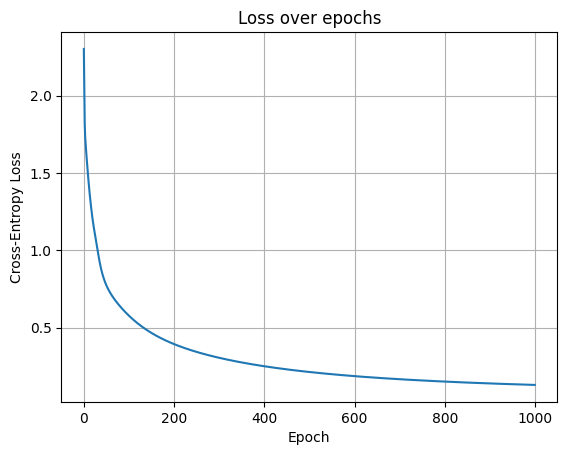

In [4]:
model = NeuralNetwork(n_input=4, n_hidden=6, n_output=3, learning_rate=0.1, epochs=1000)
model.train(X_train, y_train)
model.evaluate(X_test, y_test)

# Визуализация потерь
plt.plot(model.loss_history)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()